In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
features = pd.read_csv('./../gdrive/AreaHealthResourceFile/AHRF_allcolumns.csv')
print(features.shape)

/home/dchen/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14,16,24,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3230, 6963)


In [3]:
numbers = features.select_dtypes('number')
numbers = numbers.drop(['blank', '____________'], axis='columns')
numbers.head()

,fips_st___cty_code,secondary_entity_of_file,date_of_file,date_of_creation,file_length,fips_state_code,fips_county_code,census_region_code,census_division_code,federal_region_code,...,daily_fine_particulate_matter_a1,daily_fine_particulate_matter_a2,daily_fine_particulate_matter_a3,days_w_8_hr_avg_ozone_ovr_naaqs_,days_w_8_hr_avg_ozone_ovr_naaqs1,days_w_8_hr_avg_ozone_ovr_naaqs2,days_w_8_hr_avg_ozone_ovr_naaqs3,days_w_8_hr_avg_ozone_ovr_naaqs4,days_w_8_hr_avg_ozone_ovr_naaqs5,elevation_feet_1976
0,1001,1001,2015,15181.0,32407.0,1,1,3.0,6.0,4,...,13.07,11.35,13.31,0.0,1.0,0.0,0.0,5.0,3.0,290.0
1,1003,1003,2015,15181.0,32407.0,1,3,3.0,6.0,4,...,12.77,11.81,11.80,2.0,2.0,1.0,2.0,7.0,14.0,155.0
2,1005,1005,2015,15181.0,32407.0,1,5,3.0,6.0,4,...,12.58,10.98,12.11,0.0,0.0,0.0,0.0,2.0,3.0,220.0
3,1007,1007,2015,15181.0,32407.0,1,7,3.0,6.0,4,...,13.16,11.40,13.68,0.0,2.0,0.0,2.0,12.0,7.0,224.0
4,1009,1009,2015,15181.0,32407.0,1,9,3.0,6.0,4,...,12.42,10.95,13.04,1.0,1.0,0.0,4.0,10.0,7.0,870.0


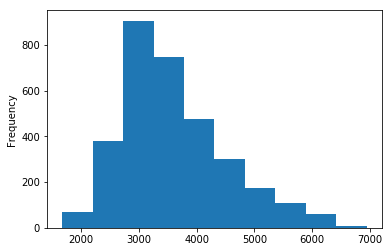

In [4]:
# count the number of values across each row of data
# towards 0 means number of rows with a lot of missing
# towards the right means number of rows with 'complete' data
numbers['num_complete'] = numbers.apply(np.count_nonzero, axis='columns')
numbers['num_complete'].plot(kind='hist')
plt.show()

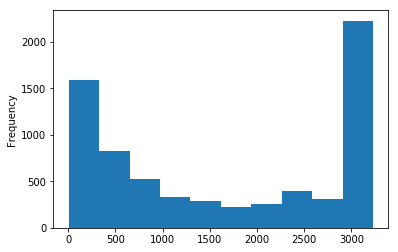

In [5]:
# do the same thing across each column
# towards 0 means columns that are just storing 'missing' data
# towards the right are counts of columns that have mostly complete observations
ct_by_columns = numbers.apply(np.count_nonzero, axis='index')
ct_by_columns.plot(kind='hist')
plt.show()

In [6]:
complete_columns = numbers.dropna(axis='columns')
complete_columns = complete_columns.drop('num_complete', axis='columns')
print(complete_columns.columns)
print(complete_columns.shape)

Index(['fips_st___cty_code', 'secondary_entity_of_file', 'date_of_file',
       'date_of_creation', 'file_length', 'fips_state_code',
       'fips_county_code', 'federal_region_code',
       '__nhsc_dental_sites_w_providers2', '__nhsc_mental_health_sites_w_pr2',
       '__nhsc_fte_dental_providers_2013', '__nhsc_fte_mental_hlth_provider2'],
      dtype='object')
(3230, 12)


In [8]:
# clusters heavily along the fips_st___cty_code variable, it seems
kmeans = KMeans(n_clusters=8, random_state=0).fit(complete_columns)

In [9]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [10]:
kmeans_2 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
kmeans_2.head()

,cluster
0,5
1,5
2,5
3,5
4,5


In [11]:
pca = PCA(n_components=2).fit(complete_columns)
pca_trans = pca.transform(complete_columns)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
kmeans_df = pd.concat([kmeans_2, pca_trans_df], axis=1)
kmeans_df.head()

,cluster,pca1,pca2
0,5,-43018.852562,-71.999948
1,5,-43016.022910,-70.080584
2,5,-43013.193156,-68.145931
3,5,-43010.363453,-66.218923
4,5,-43007.533750,-64.291915


In [12]:
kmeans_df.cluster.value_counts().head()

4    621
0    558
6    537
1    509
7    324
Name: cluster, dtype: int64

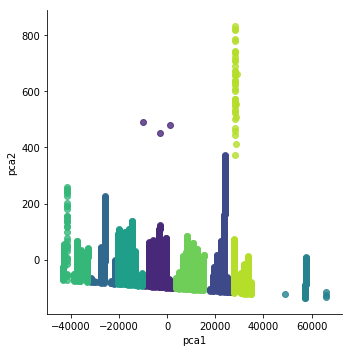

In [13]:
sns.lmplot(x='pca1', y='pca2', data=kmeans_df, hue='cluster', fit_reg=False, palette='viridis', legend=False)
plt.show()

In [14]:
len(complete_columns.fips_st___cty_code.unique())

3230

In [15]:
responses = pd.read_excel('../gdrive/OpioidPoisoningTracker/data/cdc_prescribing/CDC_prescribing_rates_county.xlsx')

responses['2016 Prescribing Rate'] = pd.to_numeric(responses['2016 Prescribing Rate'], errors='coerce')

In [16]:
responses.head()

,County,State,FIPS County Code,2016 Prescribing Rate
0,"Aleutians East, AK",AK,2013,NaN
1,"Aleutians West, AK",AK,2016,NaN
2,"Anchorage, AK",AK,2020,66.3
3,"Bethel, AK",AK,2050,NaN
4,"Bristol Bay, AK",AK,2060,NaN


In [17]:
print(features.columns)

Index(['blank', 'fips_st___cty_code', 'entity_of_file',
       'secondary_entity_of_file', 'date_of_file', 'date_of_creation',
       'file_length', 'state_name', 'state_name_abbreviation', 'county_name',
       ...
       'daily_fine_particulate_matter_a2', 'daily_fine_particulate_matter_a3',
       'days_w_8_hr_avg_ozone_ovr_naaqs_', 'days_w_8_hr_avg_ozone_ovr_naaqs1',
       'days_w_8_hr_avg_ozone_ovr_naaqs2', 'days_w_8_hr_avg_ozone_ovr_naaqs3',
       'days_w_8_hr_avg_ozone_ovr_naaqs4', 'days_w_8_hr_avg_ozone_ovr_naaqs5',
       'elevation_feet_1976', '____________'],
      dtype='object', length=6963)


In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(features.fips_state_code.head())


0    1
1    1
2    1
3    1
4    1
Name: fips_state_code, dtype: int64


In [19]:
features.head()

,blank,fips_st___cty_code,entity_of_file,secondary_entity_of_file,date_of_file,date_of_creation,file_length,state_name,state_name_abbreviation,county_name,...,daily_fine_particulate_matter_a2,daily_fine_particulate_matter_a3,days_w_8_hr_avg_ozone_ovr_naaqs_,days_w_8_hr_avg_ozone_ovr_naaqs1,days_w_8_hr_avg_ozone_ovr_naaqs2,days_w_8_hr_avg_ozone_ovr_naaqs3,days_w_8_hr_avg_ozone_ovr_naaqs4,days_w_8_hr_avg_ozone_ovr_naaqs5,elevation_feet_1976,____________
0,NaN,1001,AHRF,1001,2015,15181.0,32407.0,Alabama,AL,Autauga,...,11.35,13.31,0.0,1.0,0.0,0.0,5.0,3.0,290.0,NaN
1,NaN,1003,AHRF,1003,2015,15181.0,32407.0,Alabama,AL,Baldwin,...,11.81,11.80,2.0,2.0,1.0,2.0,7.0,14.0,155.0,NaN
2,NaN,1005,AHRF,1005,2015,15181.0,32407.0,Alabama,AL,Barbour,...,10.98,12.11,0.0,0.0,0.0,0.0,2.0,3.0,220.0,NaN
3,NaN,1007,AHRF,1007,2015,15181.0,32407.0,Alabama,AL,Bibb,...,11.40,13.68,0.0,2.0,0.0,2.0,12.0,7.0,224.0,NaN
4,NaN,1009,AHRF,1009,2015,15181.0,32407.0,Alabama,AL,Blount,...,10.95,13.04,1.0,1.0,0.0,4.0,10.0,7.0,870.0,NaN


In [20]:
joined = pd.merge(features, responses, left_on='fips_st___cty_code', right_on='FIPS County Code')

In [21]:
joined.shape

(3143, 6967)

In [22]:
joined.head()

,blank,fips_st___cty_code,entity_of_file,secondary_entity_of_file,date_of_file,date_of_creation,file_length,state_name,state_name_abbreviation,county_name,...,days_w_8_hr_avg_ozone_ovr_naaqs2,days_w_8_hr_avg_ozone_ovr_naaqs3,days_w_8_hr_avg_ozone_ovr_naaqs4,days_w_8_hr_avg_ozone_ovr_naaqs5,elevation_feet_1976,____________,County,State,FIPS County Code,2016 Prescribing Rate
0,NaN,1001,AHRF,1001,2015,15181.0,32407.0,Alabama,AL,Autauga,...,0.0,0.0,5.0,3.0,290.0,NaN,"Autauga, AL",AL,1001,129.6
1,NaN,1003,AHRF,1003,2015,15181.0,32407.0,Alabama,AL,Baldwin,...,1.0,2.0,7.0,14.0,155.0,NaN,"Baldwin, AL",AL,1003,123.8
2,NaN,1005,AHRF,1005,2015,15181.0,32407.0,Alabama,AL,Barbour,...,0.0,0.0,2.0,3.0,220.0,NaN,"Barbour, AL",AL,1005,92.7
3,NaN,1007,AHRF,1007,2015,15181.0,32407.0,Alabama,AL,Bibb,...,0.0,2.0,12.0,7.0,224.0,NaN,"Bibb, AL",AL,1007,97.2
4,NaN,1009,AHRF,1009,2015,15181.0,32407.0,Alabama,AL,Blount,...,0.0,4.0,10.0,7.0,870.0,NaN,"Blount, AL",AL,1009,56.9


In [23]:
from sklearn import tree

In [24]:
clf = tree.DecisionTreeRegressor()

In [35]:
from sklearn.model_selection import train_test_split

tree_df = joined.select_dtypes('number')
tree_df = tree_df.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train = tree_df.drop('2016 Prescribing Rate', axis='columns')
y_train = tree_df[['2016 Prescribing Rate']]

clf = clf.fit(X_train, y_train)


In [36]:
y_1 = clf.predict(X_test)

In [ ]:
plt.scatter(y_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")

In [42]:
X_train.shape

(3143, 6951)

In [43]:
y_train.shape

(3143, 1)

ValueError: x and y must have same first dimension, but have shapes (3143, 6951) and (1038, 6951)

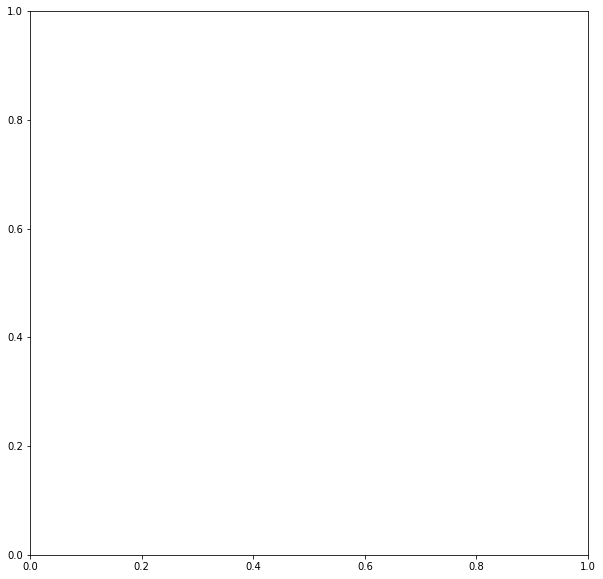

In [46]:
plt.figure(figsize=(10, 10))

plt.plot(X_train, X_test, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.show()

In [28]:
import numpy as np

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

rng = np.random.RandomState(0)

dataset = tree_df.sample(frac=.1)
X_full, y_full = tree_df.drop('2016 Prescribing Rate', axis='columns'), tree_df[['2016 Prescribing Rate']]
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

# Estimate the score on the entire dataset, with no missing values
#estimator = RandomForestRegressor(random_state=0, n_estimators=100)
#score = cross_val_score(estimator, X_full, y_full).mean()
#print("Score with the entire dataset = %.2f" % score)

# Add missing values in 75% of the lines
#missing_rate = 0.75
#n_missing_samples = int(np.floor(n_samples * missing_rate))
#missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
#                                      dtype=np.bool),
#                             np.ones(n_missing_samples,
#                                     dtype=np.bool)))
#rng.shuffle(missing_samples)
#missing_features = rng.randint(0, n_features, n_missing_samples)

# Estimate the score without the lines containing missing values
#X_filtered = X_full[~missing_samples, :]
#y_filtered = y_full[~missing_samples]
#estimator = RandomForestRegressor(random_state=0, n_estimators=100)
#score = cross_val_score(estimator, X_filtered, y_filtered).mean()
#print(f"Score without the samples containing missing values = {score}")

# Estimate the score after imputation of the missing values
X_missing = X_full.copy()
X_missing = X_missing.fillna('0')
#X_missing[np.where(missing_samples)[0], missing_features] = 0
y_missing = y_full.copy()
estimator = Pipeline([("imputer", Imputer(missing_values=0,
                                          strategy="mean",
                                          axis=0)),
                      ("forest", RandomForestRegressor(random_state=0,
                                                       n_estimators=2))])
score = cross_val_score(estimator, X_missing, y_missing).mean()
print("Score after imputation of the missing values = %.2f" % score)

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(tree_df.drop('2016 Prescribing Rate', axis='columns'), tree_df[['2016 Prescribing Rate']])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

print(regr.feature_importances_)
